In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import cv2
import numpy as np
import glob
import os
from random import shuffle

In [2]:
from tensorflow import keras

In [3]:
import tensorflow as tf
print(tf.test.gpu_device_name())

In [4]:
X_train=[]
X_test=[]
Y_test=[]
Y_train=[]
dataTr=[]
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/entrenamiento/Melanoma_escalado','*.jpg')):
    dataTr.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/entrenamiento/Carcinoma_escalado','*.jpg')):
    dataTr.append([0,cv2.imread(filename)])

In [5]:
dataTe=[]
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/prueba/melanoma_escalado','*.jpg')):
    dataTe.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/prueba/carcinoma_escalado','*.jpg')):
    dataTe.append([0,cv2.imread(filename)])

In [6]:
def particion(datos):
    imagenes=[]
    etiquetas=[]
    for i,j in datos:
        imagenes.append(j)
        etiquetas.append(i)
    imagenes=np.array(imagenes)
    etiquetas=np.array(etiquetas)
    return (imagenes,etiquetas)

In [7]:
shuffle(dataTr)
print("en total tenemos: "+str(len(dataTr))+ " imagenes dentro de la carpeta train")
shuffle(dataTe)
print("en total tenemos: "+str(len(dataTe))+ " imagenes dentro de la carpeta test")

en total tenemos: 12279 imagenes dentro de la carpeta train
en total tenemos: 5261 imagenes dentro de la carpeta test


In [8]:
porcion1=dataTr[0:12000]
porcion2=dataTe[0:5000]
print("para entrenamiento tendremos: "+str(len(porcion1))+ " imagenes de la carpeta de train")
print("para prueba tendremos: "+str(len(porcion2))+ " imagenes de la carpeta de test")

para entrenamiento tendremos: 12000 imagenes de la carpeta de train
para prueba tendremos: 5000 imagenes de la carpeta de test


In [9]:
x_e,y_e=particion(porcion1)
x_p,y_p=particion(porcion2)

In [10]:
def validacion(x_e,y_e,x_p,y_p,modelo1,epocas):
    entre=modelo1.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
    a=modelo1.evaluate(x_p,y_p)
    return a[1]

In [11]:
def evaluacion(modelo1,porcentaje,nombre,v1,v2):
    prediccion=0
    epocas=1
    while(True):
        if prediccion < porcentaje:
            prediccion=(validacion(x_e,y_e,x_p,y_p,modelo1,1))*100
            epocas +=1
            v1.append(epocas-1)
            v2.append(prediccion)
        else:
            print("==> Para el metodo "+nombre+" se utilizo: "+str(epocas-1)+" epocas para llegar a mas del "+str(porcentaje)+"% de acertividad")
            break 

In [12]:
modelo=Sequential()
modelo.add(Convolution2D(8,(3,3),input_shape=(224,224,3),activation='relu'))
modelo.add(Convolution2D(16,(3,3),activation='relu'))
modelo.add(MaxPooling2D(pool_size=((2,2))))
modelo.add(Flatten())
modelo.add(Dense(128,activation='relu'))
modelo.add(Dense(100,activation='relu'))
modelo.add(Dense(100,activation='relu'))
modelo.add(Dense(1,activation='sigmoid'))
modelo.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 16)      1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 193600)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               24780928  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               12900     
_________________________________________

In [13]:
modelo_adam = keras.optimizers.Adam(learning_rate=0.0008)
modelo.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
v_eA=[]
v_aA=[]
evaluacion(modelo,82,"ADAM",v_eA,v_aA)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 0.6411 - acc: 0.7232
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 8s 2ms/sample - loss: 0.5400 - acc: 0.7570
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 8s 2ms/sample - loss: 0.4784 - acc: 0.8110
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 8s 2ms/sample - loss: 0.5219 - acc: 0.8182
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 8s 2ms/sample - loss: 0.5986 - acc: 0.8132
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 8s 2ms/sample - loss: 0.5982 - acc: 0.8358
==> Para el metodo ADAM se utilizo: 6 epocas para llegar a mas del 82% de acertivida

In [14]:
modelo.save("D:/UMSA/Documentos/CNN cancer de piel/MODELOS/17000_2_2/modelo")

In [15]:
modelo.save_weights("D:/UMSA/Documentos/CNN cancer de piel/PESOS/17000_2_2/modelo_pesos")

In [16]:
count=1
print("# de EPOCAS     Valor del Accuracy")
print("----------------------------------")
for i in v_aA:
    print("epoca ",count," => ",i)
    count +=1

# de EPOCAS     Valor del Accuracy
----------------------------------
epoca  1  =>  72.32000231742859
epoca  2  =>  75.70000290870667
epoca  3  =>  81.09999895095825
epoca  4  =>  81.81999921798706
epoca  5  =>  81.31999969482422
epoca  6  =>  83.57999920845032


In [17]:
%matplotlib inline
import matplotlib.pyplot as mp

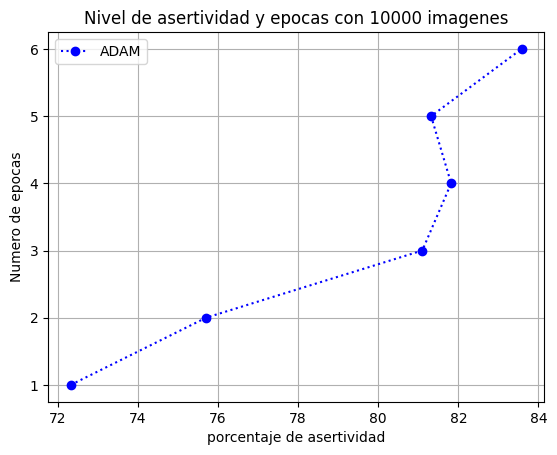

In [18]:
mp.plot(v_aA,v_eA, marker='o', linestyle=':', color='b', label = "ADAM")

#mp.xticks(np.arange(70,100,2))
#mp.yticks(np.arange(0,4,1))
mp.xlabel("porcentaje de asertividad")
mp.ylabel("Numero de epocas")
mp.legend(loc="upper left")
mp.title("Nivel de asertividad y epocas con 10000 imagenes")
mp.grid(True)
mp.show()

In [19]:
modelo_cargado=keras.models.load_model("D:/UMSA/Documentos/CNN cancer de piel/MODELOS/12500/modelo")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
modelo_cargado.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 394272)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               50466944  
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,474,341
Trainable params: 50,474,341
Non-trainable params: 0
____________________________________________

In [21]:
%matplotlib inline
import matplotlib.pyplot as mp

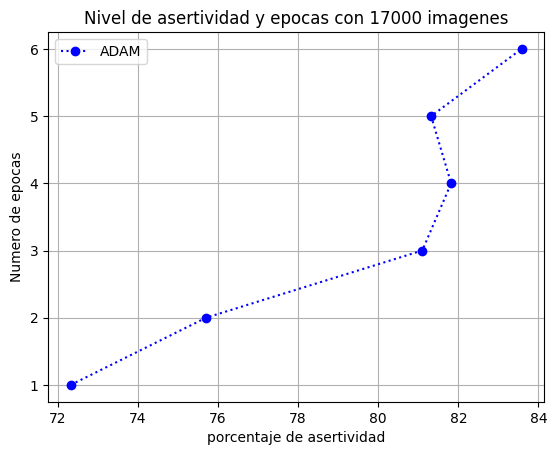

In [22]:
mp.plot(v_aA,v_eA, marker='o', linestyle=':', color='b', label = "ADAM")

#mp.xticks(np.arange(70,100,2))
#mp.yticks(np.arange(0,4,1))
mp.xlabel("porcentaje de asertividad")
mp.ylabel("Numero de epocas")
mp.legend(loc="upper left")
mp.title("Nivel de asertividad y epocas con 17000 imagenes")
mp.grid(True)
mp.show()

In [23]:
lr_probs = modelo.predict_proba(x_p)
lr_probs = lr_probs[:, 0]
ns_probs = [0 for _ in range(len(y_p))]


In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [25]:
# Calculamos el AUC
ns_auc = roc_auc_score(y_p, ns_probs)
lr_auc = roc_auc_score(y_p, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Red Neuronal: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Red Neuronal: ROC AUC=0.908


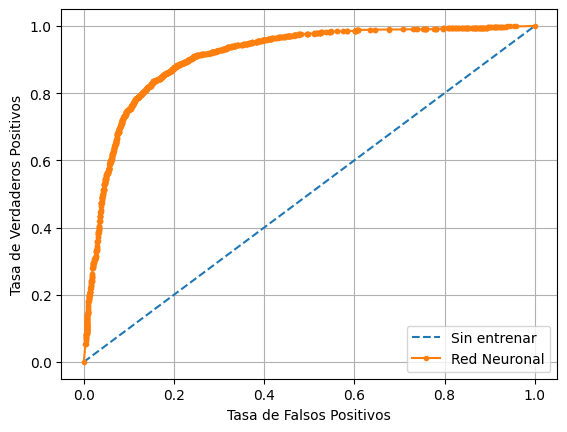

In [26]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_p, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_p, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Red Neuronal')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
mp.grid(True)
pyplot.show()

In [27]:
lr_probs = modelo.predict_proba(x_p)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 0]

In [28]:
yhat = modelo.predict(x_p)

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [30]:
lr_precision, lr_recall, _ = precision_recall_curve(y_p, lr_probs)
lr_auc =  auc(lr_recall, lr_precision)
no_skill = len(y_p[y_p==1]) / len(y_p)


Redes neuronales: auc=0.890


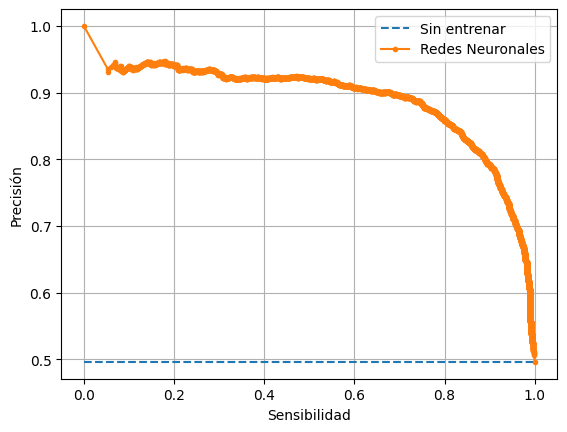

In [31]:
print('Redes neuronales: auc=%.3f' % (lr_auc))
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Redes Neuronales')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
mp.grid(True)
pyplot.show()

In [32]:
modelo.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 8) dtype=float32>,
 <tf.Variable 'conv2d/bias:0' shape=(8,) dtype=float32>,
 <tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 8, 16) dtype=float32>,
 <tf.Variable 'conv2d_1/bias:0' shape=(16,) dtype=float32>,
 <tf.Variable 'dense/kernel:0' shape=(193600, 128) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(128, 100) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'dense_2/kernel:0' shape=(100, 100) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'dense_3/kernel:0' shape=(100, 1) dtype=float32>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32>]